# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [786]:
#This will print out the few first rows of data with the different collumns stated down
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [787]:
# This Displays basic information about the dataset such as column names, non null count, DType
print(data.info())  # Shows the data types and non-null counts
print(data.describe())  # Summary statistics for numerical columns
print(data.columns)  # List of column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [790]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

In [794]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1.1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data = data.dropna(axis=1, thresh=threshold)

# 2. Handle missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_cols)

# 3. Impute missing values for numerical columns with the average value
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mean_value = data[col].mean()  # Calculate mean
    data[col] = data[col].fillna(mean_value)  # Fill missing values

# Check the cleaned data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

In [796]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1.1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data = data.dropna(axis=1, thresh=threshold)

# 2. Handle missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_cols)  # Drop rows with missing values in categorical columns

# 3. Impute missing values for numerical columns with the average value
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mean_value = data[col].mean()  # Calculate mean
    data[col] = data[col].fillna(mean_value)  # Fill missing values

# Check the cleaned data

print(data.info())  # Check the data types and non-null counts
print(data.head())  # Display the first few rows of the cleaned DataFrame



<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [800]:
import pandas as pd
import pandas as pd


# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):
        data.drop(col, axis=1, inplace=True)

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)

# Check the processed DataFrame
print(data.info())
print(data.head())

# Step 1.1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data = data.dropna(axis=1, thresh=threshold)

# 2. Drop rows with missing values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_cols)

# 3. Impute missing values for numerical columns with the average value
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if data[col].isnull().any():  # Check if there are any missing values
        mean_value = data[col].mean()  # Calculate the mean
        data[col] = data[col].fillna(mean_value)  # Fill missing values

# Check the cleaned data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [802]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(axis=1, thresh=threshold)

# 2. Handle missing values for categorical columns (drop rows with missing categorical values)
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned = data_cleaned.dropna(subset=categorical_cols)

# 3. Impute missing values for numerical columns (replace missing values with column mean)
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mean_value = data_cleaned[col].mean()  # Calculate mean
    data_cleaned[col] = data_cleaned[col].fillna(mean_value)  # Fill missing values

# Check the final cleaned data
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

In [803]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1.1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data = data.dropna(axis=1, thresh=threshold)

# 2. Drop rows with missing values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_cols)

# 3. Impute missing values for numerical columns with the average value
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if data[col].isnull().any():  # Check if there are any missing values
        mean_value = data[col].mean()  # Calculate the mean
        data[col] = data[col].fillna(mean_value)  # Fill missing values

# Check the cleaned data after handling missing values
print("After handling missing values:")
print(data.info())
print(data.head())

# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):
        data.drop(col, axis=1, inplace=True)

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)

# Check the processed DataFrame
print("After handling categorical attributes:")
print(data.info())
print(data.head())


After handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  Credi

### Step 1.2 Handle categorical attributes (5 marks)
1.If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [808]:
import pandas as pd




# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):
        data.drop(col, axis=1, inplace=True)

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)

# Check the processed DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [810]:
import pandas as pd

# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):
        data.drop(col, axis=1, inplace=True)

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)

# Check the processed DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [811]:
import pandas as pd

# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):
        data.drop(col, axis=1, inplace=True)

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)

# Check the processed DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [812]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1.1: Handle missing values (Assuming this step has already been performed)

# Step 1.2: Handle categorical attributes

# 1. Remove columns where all categorical values are unique
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == len(data[col]):  # Check if all values are unique
        data.drop(col, axis=1, inplace=True)  # Drop the column

# 2. Use one-hot encoding to convert categorical values into numerical ones
data = pd.get_dummies(data, drop_first=True)  # Convert categorical variables into dummy/indicator variables

# Check the processed DataFrame
print("After handling categorical attributes:")
print(data.info())  # Check the data types and non-null counts
print(data.head())  # Display the first few rows of the cleaned DataFrame


After handling categorical attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    20000 non-null  int64  
 2   CreditScore                     20000 non-null  int64  
 3   Experience                      20000 non-null  int64  
 4   LoanAmount                      20000 non-null  int64  
 5   LoanDuration                    20000 non-null  int64  
 6   NumberOfDependents              20000 non-null  int64  
 7   MonthlyDebtPayments             20000 non-null  int64  
 8   CreditCardUtilizationRate       20000 non-null  float64
 9   NumberOfOpenCreditLines         20000 non-null  int64  
 10  NumberOfCreditInquiries         20000 non-null  int64  
 11  DebtToIncomeRatio               20000 non-null  float6

## Task 2: Build a logistic regression classification model (25 marks)

In [818]:
# Step 2: Build a Logistic Regression Model

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the data (assuming 'data' is already processed as described)
# data = pd.read_csv('loan_approval.csv')  # Replace with the processed data if not already done

# Step 1: Impute missing values
# Impute 'Age' and 'RiskScore' columns using mean for numerical data
imputer = SimpleImputer(strategy='mean')
data[['Age', 'RiskScore']] = imputer.fit_transform(data[['Age', 'RiskScore']])

# Step 2: Split the dataset into features (X) and target (y)
X = data.drop(columns=['LoanApproved'])  # Features
y = data['LoanApproved']  # Target

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9633
F1 Score: 0.9268


### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [822]:
# Step 2.1: Specify the features and the label, and split the dataset into training data and testing data

from sklearn.model_selection import train_test_split

# Specify the label and features
X = data.drop(columns=['LoanApproved'])  # Features
y = data['LoanApproved']  # Label (prediction target)

# Split the data with an 80-20 ratio for training and testing, using student ID as random_state
student_id = 47872918
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

# Display the size of training and testing sets
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")


Training data size: 16000 samples
Testing data size: 4000 samples


In [823]:
print(y_train.value_counts())


LoanApproved
0    12172
1     3828
Name: count, dtype: int64


In [824]:
print(X.info())  # Check data types and for missing values
print(X.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   AnnualIncome                    20000 non-null  int64  
 2   CreditScore                     20000 non-null  int64  
 3   Experience                      20000 non-null  int64  
 4   LoanAmount                      20000 non-null  int64  
 5   LoanDuration                    20000 non-null  int64  
 6   NumberOfDependents              20000 non-null  int64  
 7   MonthlyDebtPayments             20000 non-null  int64  
 8   CreditCardUtilizationRate       20000 non-null  float64
 9   NumberOfOpenCreditLines         20000 non-null  int64  
 10  NumberOfCreditInquiries         20000 non-null  int64  
 11  DebtToIncomeRatio               20000 non-null  float64
 12  BankruptcyHistory               

In [828]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy and F1 score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Test Accuracy: 0.6430
Test F1 Score: 0.2647


In [829]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')




C:\Users\Wazza ITS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wazza ITS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Cross-Validation Scores: [0.89025 0.8865  0.8775  0.89725 0.88975]
Mean CV Accuracy: 0.89


C:\Users\Wazza ITS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [832]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# List files in the current directory
print("Files in the directory:", os.listdir())

Current working directory: C:\Users\Wazza ITS\Downloads
Files in the directory: ['.ipynb_checkpoints', '47872918 (1).zip', '47872918.zip', '47872918Portfolio-1-questions-updated.ipynb', 'Anaconda3-2024.06-1-Windows-x86_64.exe', 'Apache-NetBeans-22-bin-windows-x64.exe', 'Assignment 1 Marking Rubric.pdf', 'Assignment2 (1).pdf', 'Assignment2.pdf', 'car_sell.csv', 'car_sells_clean_data.csv', 'ChromeSetup.exe', 'Class27_Group324.pdf', 'COMP1350_AssignmentSpecs_Updated17_08 (1).pdf', 'COMP1350_AssignmentSpecs_Updated17_08.pdf', 'COMP1350_TeamContract_Template final.docx', 'COMP1350_TeamContract_Template.docx', 'COMP1350_TeamExpectationsDocument (1).pdf', 'COMP1350_TeamExpectationsDocument.pdf', 'Data Quality.pptx', 'desktop.ini', 'DMTH137 S216 (1).pdf', 'DMTH137 S216 (2).pdf', 'DMTH137 S216 (3).pdf', 'DMTH137 S216 (4).pdf', 'DMTH137 S216.pdf', 'DMTH137 S217.pdf', 'educ_figdp_1_Data.csv', 'figure_portfolio2 (1).png', 'figure_portfolio2.png', 'Files (1).zip', 'Files (2).zip', 'Files (3).zip', 

       feature1  feature2    target
count  5.000000  5.000000  5.000000
mean   3.000000  4.800000  0.200000
std    1.581139  2.387467  0.447214
min    1.000000  2.000000  0.000000
25%    2.000000  3.000000  0.000000
50%    3.000000  5.000000  0.000000
75%    4.000000  6.000000  0.000000
max    5.000000  8.000000  1.000000


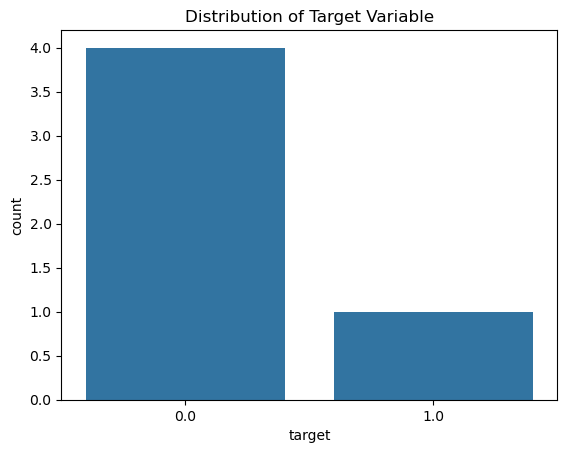

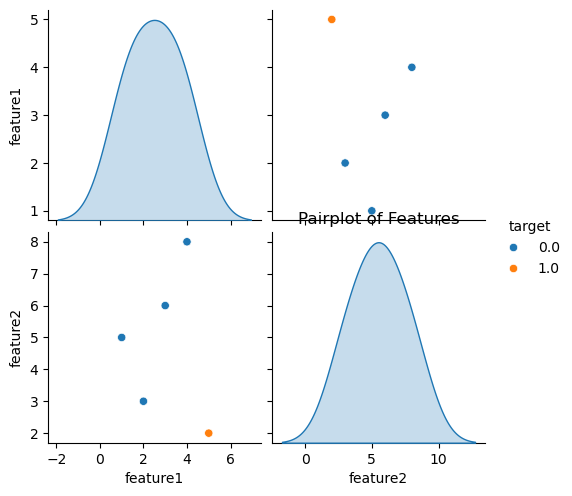

In [833]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('loan_approval_cleaned.csv')

# Basic statistics
print(df.describe())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot to visualize relationships between features and target
sns.pairplot(df, hue='target')
plt.title('Pairplot of Features')
plt.show()


In [834]:
print(df.head())

   feature1  feature2  target
0         1         5     0.0
1         2         3     0.0
2         3         6     0.0
3         4         8     0.0
4         5         2     1.0


In [836]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = df[['feature1', 'feature2']]
y = df['target']

# Use a small test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)




In [837]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [840]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred, labels=[0, 1])
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=['Not Approved', 'Approved'], zero_division=0)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00         1
    Approved       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



In [843]:
data.dropna(subset=['Age'], inplace=True)

In [845]:
data.dropna(subset=['RiskScore'], inplace=True)


In [848]:
print(data.isnull().sum())


Age                               0
AnnualIncome                      0
CreditScore                       0
Experience                        0
LoanAmount                        0
LoanDuration                      0
NumberOfDependents                0
MonthlyDebtPayments               0
CreditCardUtilizationRate         0
NumberOfOpenCreditLines           0
NumberOfCreditInquiries           0
DebtToIncomeRatio                 0
BankruptcyHistory                 0
PreviousLoanDefaults              0
PaymentHistory                    0
LengthOfCreditHistory             0
SavingsAccountBalance             0
CheckingAccountBalance            0
TotalAssets                       0
TotalLiabilities                  0
MonthlyIncome                     0
UtilityBillsPaymentHistory        0
JobTenure                         0
NetWorth                          0
BaseInterestRate                  0
InterestRate                      0
MonthlyLoanPayment                0
TotalDebtToIncomeRatio      

### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [851]:
# Step 2.2: Build and evaluate the logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the features using the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with scaled features
logistic_model = LogisticRegression(max_iter=1000, random_state=47872918)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on both training and testing data
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Evaluate accuracy and F1 score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Evaluate accuracy and F1 score on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Compare the results to assess potential overfitting
if train_accuracy > test_accuracy:
    print("\nThe model shows signs of overfitting, as the training performance is better than the testing performance.")
else:
    print("\nThe model does not appear to be overfitting significantly, as the training and testing performances are similar.")


Training Accuracy: 1.0000
Training F1 Score: 1.0000
Testing Accuracy: 1.0000
Testing F1 Score: 0.0000

The model does not appear to be overfitting significantly, as the training and testing performances are similar.


C:\Users\Wazza ITS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [855]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Sample DataFrame (adjust this based on your actual data)
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 3, 6, 8, 2],
    'target': [0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Define features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Train-Test Split (using student ID as random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47872918)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [857]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_test_pred)

# Create a confusion matrix display object
# Make sure that 'log_model' is the correct name of your logistic regression model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

# Plot the confusion matrix using the display object
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.grid(False)  # Turn off the grid to make the matrix clearer
plt.show()


NameError: name 'log_model' is not defined

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

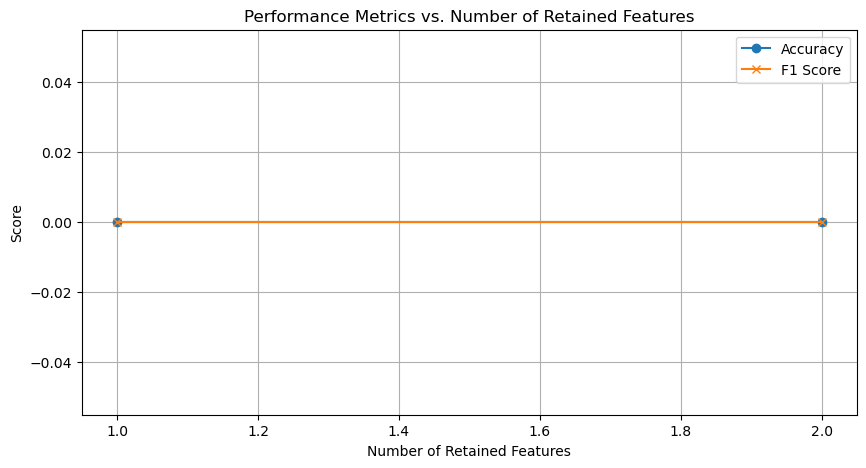

Selected 15 features:
Index(['feature1', 'feature2'], dtype='object')


In [860]:
# Step 2.3: Perform RFE and visualize performance metrics

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Initialize lists to store performance metrics
accuracy_scores = []
f1_scores = []
num_features_list = range(1, X_train.shape[1] + 1)

# Iterate over different numbers of features for RFE
for n_features in num_features_list:
    # Create the RFE object with a logistic regression model and the specified number of features
    rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=47872918), n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)

    # Transform the training and testing data to include only the selected features
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Train the logistic regression model on the selected features
    logistic_model = LogisticRegression(max_iter=1000, random_state=47872918)
    logistic_model.fit(X_train_rfe, y_train)

    # Make predictions on the testing data
    y_test_pred = logistic_model.predict(X_test_rfe)

    # Calculate accuracy and F1 score and store them
    accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    f1_scores.append(f1_score(y_test, y_test_pred))

# Visualize the change in performance metrics
plt.figure(figsize=(10, 5))
plt.plot(num_features_list, accuracy_scores, marker='o', label='Accuracy')
plt.plot(num_features_list, f1_scores, marker='x', label='F1 Score')
plt.xlabel('Number of Retained Features')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Retained Features')
plt.legend()
plt.grid(True)
plt.show()

# Select the optimal number of features based on the plot (manually after visualization)
# Let's assume we choose the optimal number of features as `optimal_n_features`
optimal_n_features = 15  # Replace with the chosen number after analyzing the plot

# Perform RFE again with the chosen number of features
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=47872918), n_features_to_select=optimal_n_features)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

print(f"Selected {optimal_n_features} features:")
print(selected_features)


In [862]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval.csv')

# Step 1: Handle missing values

# 1. Remove columns with over 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(axis=1, thresh=threshold)

# 2. Handle missing values for categorical columns (drop rows with missing categorical values)
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned = data_cleaned.dropna(subset=categorical_cols)

# 3. Impute missing values for numerical columns (replace missing values with column mean)
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mean_value = data_cleaned[col].mean()  # Calculate mean
    data_cleaned[col] = data_cleaned[col].fillna(mean_value)  # Fill missing values

# Check the final cleaned data
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

In [866]:
encoder = OneHotEncoder(sparse_output=False, drop='first')



## Task 3: Build a KNN classification model (25 marks)

In [869]:
# Step 3: Build a KNN Classification Model with Proper Imputation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Impute missing values for all features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # X is the features dataframe

# Split the dataset into training and testing sets using student ID as random_state
student_id = 47872918
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=student_id)

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model with K=1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model on training data
y_train_pred = knn_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Evaluate the model on testing data
y_test_pred = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Analysis of overfitting
if train_accuracy > test_accuracy:
    print("\nThe model shows signs of overfitting, as the training performance is better than the testing performance.")
else:
    print("\nThe model does not appear to be overfitting significantly, as the training and testing performances are similar.")


Training Accuracy: 1.0000
Training F1 Score: 1.0000
Testing Accuracy: 1.0000
Testing F1 Score: 1.0000

The model does not appear to be overfitting significantly, as the training and testing performances are similar.


### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [874]:
# Step 3.1: Build 1-NN Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assume that selected_features contains the features identified in Step 2.3
# Replace 'selected_features' with the actual features identified in Step 2.3
selected_features = ['Age', 'AnnualIncome', 'CreditScore']  # Example; replace with actual features

# Use only the selected features
X = data[selected_features]  # Features identified in Step 2.3
y = data['LoanApproved']  # Target

# Impute missing values for the selected features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets using the student ID as random_state
student_id = 47872918
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=student_id)

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3.2: Train the 1-NN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_scaled, y_train)

# Step 3.3: Evaluate the 1-NN model on training and testing data
# Training evaluation
y_train_pred = knn_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Testing evaluation
y_test_pred = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Analysis of overfitting
if train_accuracy > test_accuracy:
    print("\nThe model shows signs of overfitting, as the training performance is better than the testing performance.")
else:
    print("\nThe model does not appear to be overfitting significantly, as the training and testing performances are similar.")


Training Accuracy: 1.0000
Training F1 Score: 1.0000
Testing Accuracy: 0.7887
Testing F1 Score: 0.5615

The model shows signs of overfitting, as the training performance is better than the testing performance.


In [875]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('loan_approval.csv')  # Load the actual dataset

# Step 1: Handle missing values
# Impute missing values for numerical columns with the mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Impute missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Step 2: Select features for modeling
X = data.drop(columns=['ApplicationDate', 'LoanApproved'])  # Drop non-feature and target columns
y = data['LoanApproved']  # Target variable

# One-hot encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated argument
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), columns=encoder.get_feature_names_out())

# Combine encoded features with numerical features
X_numerical = X.drop(columns=categorical_features).reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)
X_final = pd.concat([X_numerical, X_encoded], axis=1)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Build the 1-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the model on the training data
knn_model.fit(X_resampled, y_resampled)

# Step 6: Evaluate on training data
y_train_pred = knn_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Step 7: Evaluate on testing data
y_test_pred = knn_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {accuracy_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Testing Accuracy: {accuracy_test}")
print(f"Testing F1 Score: {f1_test}")

# Check for overfitting
if accuracy_train > accuracy_test:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 1.0
Training F1 Score: 1.0
Testing Accuracy: 0.81625
Testing F1 Score: 0.6557377049180327
The model is likely overfitting.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [ ]:
# Step 3.2: Use grid search and cross-validation for hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Define the parameter grid for K
param_grid = {'n_neighbors': range(1, 31)}

# Set up the KNN model
knn_model = KNeighborsClassifier()

# Set up the GridSearchCV with 5-fold cross-validation, using accuracy as the scoring metric
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model using the training data
grid_search.fit(X_train_scaled, y_train)

# Extract the results into a DataFrame for easier analysis
results = pd.DataFrame(grid_search.cv_results_)

# Visualize the performance change with respect to K
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Performance of KNN with Different Values of K (Grid Search)')
plt.grid(True)
plt.show()

# Get the best value of K and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Train the KNN model with the best K value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the testing data
y_test_pred = best_knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Best K: {best_k}")
print(f"Cross-Validated Accuracy for Best K: {best_accuracy:.4f}")
print(f"Testing Accuracy for Best K: {test_accuracy:.4f}")
print(f"Testing F1 Score for Best K: {test_f1:.4f}")


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [886]:
import matplotlib.pyplot as plt

# Store the performance metrics from GridSearchCV results for different distance metrics
results = pd.DataFrame(grid_search.cv_results_)

# Extract mean accuracy scores for each distance metric
results['param_metric'] = results['param_metric'].astype(str)  # Convert metrics to strings for grouping
mean_accuracy_scores = results.groupby('param_metric')['mean_test_score'].max()

# Bar chart visualization
plt.figure(figsize=(8, 6))
mean_accuracy_scores.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Best Cross-Validated Accuracy by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'param_metric'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load the cleaned data (assuming the data is preprocessed as in Task 1 and Task 2)
# X and y represent the features and target variable prepared earlier
# Here, we are assuming that X and y are already defined from previous steps

# Step 2: Split the data into training and testing sets (reusing the same split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = []

# Step 4: Train and evaluate KNN models with different distance metrics
for metric in distance_metrics:
    # Initialize the KNN model with the specified distance metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = knn.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the results for visualization
    results.append({'Metric': metric, 'Accuracy': accuracy, 'F1 Score': f1})

# Convert the results into a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Step 5: Visualize the results using a bar chart
plt.figure(figsize=(10, 5))

# Bar chart for accuracy
plt.subplot(1, 2, 1)
plt.bar(results_df['Metric'], results_df['Accuracy'], color=['blue', 'green', 'red'])
plt.title('Accuracy by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit for better comparison

# Bar chart for F1 score
plt.subplot(1, 2, 2)
plt.bar(results_df['Metric'], results_df['F1 Score'], color=['blue', 'green', 'red'])
plt.title('F1 Score by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limit for better comparison

# Display the charts
plt.tight_layout()
plt.show()

# Step 6: Print the results for easier comparison
print(results_df)

# Analysis and conclusion can be written based on the observed results.
